<a href="https://colab.research.google.com/github/maxxxxens/Medecin_Bretagne/blob/main/MEDECIN_MAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Display 3000 Breton doctors and their information on a map

Import modules

In [38]:
import folium
from folium import plugins
import ipywidgets
import geopy
import pandas as pd
from folium.plugins import MeasureControl


Import Data frame from https://data.opendatasoft.com/explore/dataset/medecins%40public/table/

In [ ]:
medecin = pd.read_csv("/content/medecins_clean.csv",delimiter=";")

Rename NAN values for the field *Numéro de téléphone*

In [40]:
medecin["Numéro de téléphone"] = medecin["Numéro de téléphone"].fillna('Non Renseigné')




*   Add the Map,
*  Add plugins,
*   Add layers ( [sources](https://medium.com/image-vision/folium-all-you-need-for-map-visualization-206e88c8ac) )
*   import geojson files from https://france-geojson.gregoiredavid.fr/


In [42]:

# map
my_map=folium.Map(location =[48.16725551942499,-2.8453455811010087], tiles="openstreetmap",zoom_start=8 )
minimap = plugins.MiniMap()
my_map.add_child(minimap)
my_map.add_child(MeasureControl())

# add tiles to map
folium.raster_layers.TileLayer('Open Street Map').add_to(my_map)
folium.raster_layers.TileLayer('Stamen Terrain').add_to(my_map)
folium.raster_layers.TileLayer('Stamen Toner').add_to(my_map)
folium.raster_layers.TileLayer('Stamen Watercolor').add_to(my_map)
folium.raster_layers.TileLayer('CartoDB Positron').add_to(my_map)
folium.raster_layers.TileLayer('CartoDB Dark_Matter').add_to(my_map)

# add Geojson to map
folium.GeoJson('/content/departements-bretagne.geojson', name='Departements',show=False).add_to(my_map)
folium.GeoJson('/content/arrondissements-bretagne.geojson', name='Arrondissements').add_to(my_map)
folium.GeoJson('/content/communes-bretagne.geojson', name='Villes',show=False ).add_to(my_map)



# add layer control to show different maps
folium.LayerControl().add_to(my_map)

# display map
my_map

Add the geographical coordinates for each doctor and display their information 


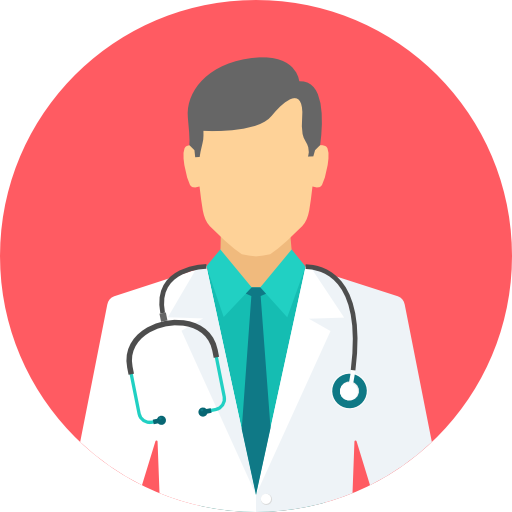
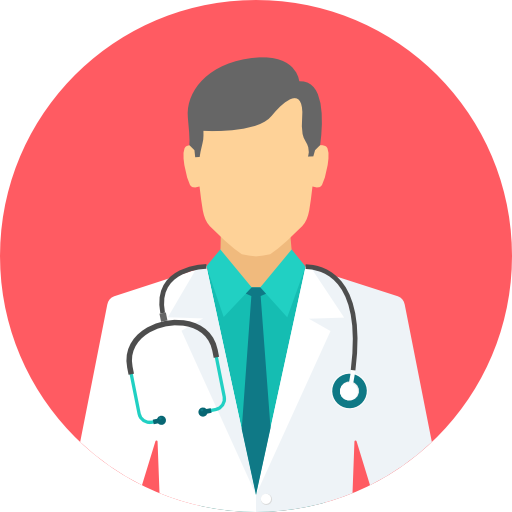
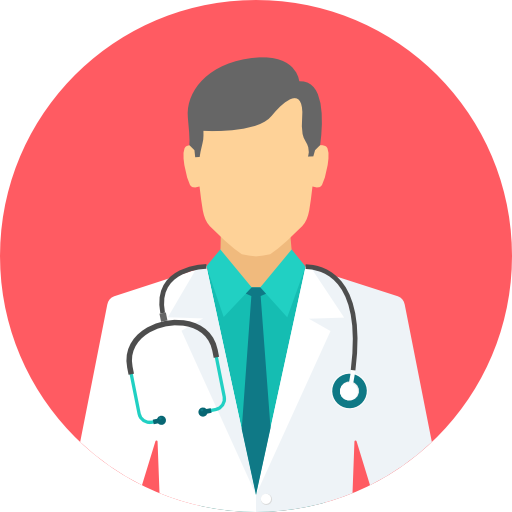
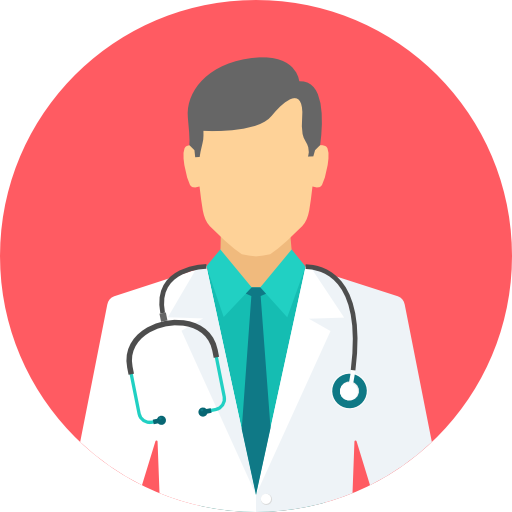
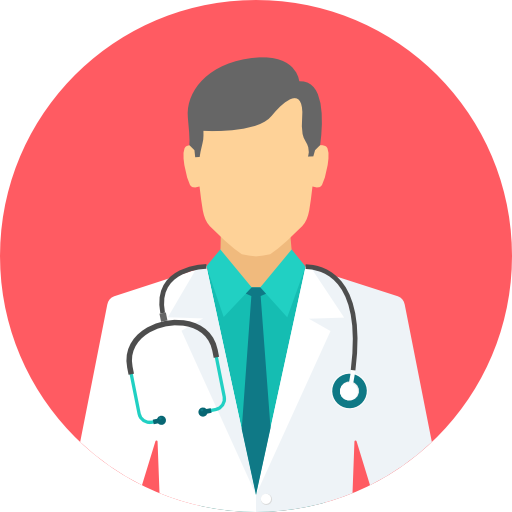
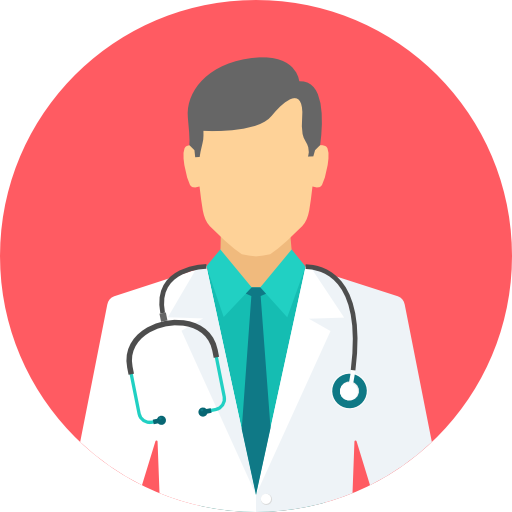
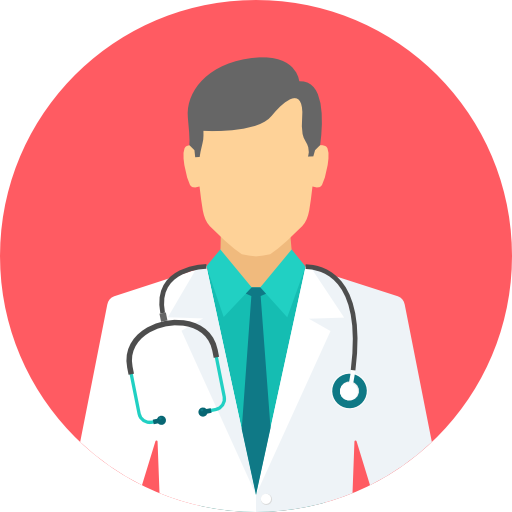
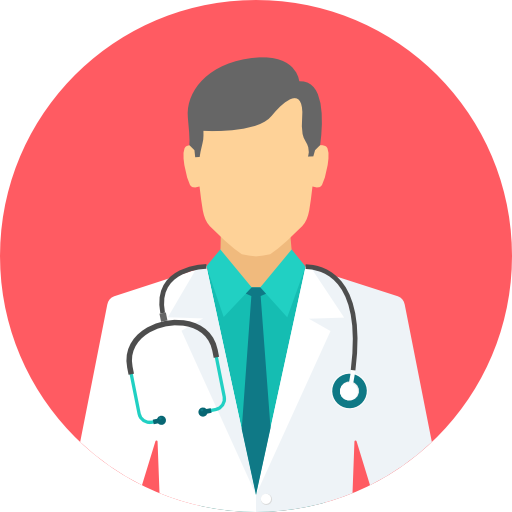
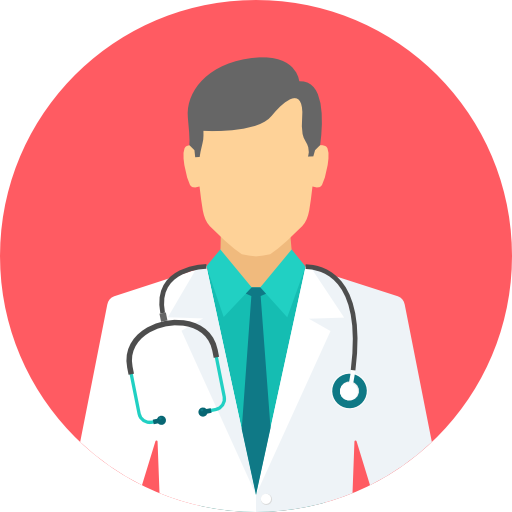
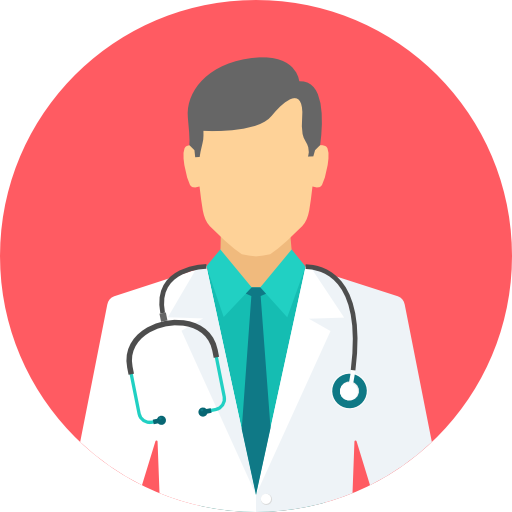
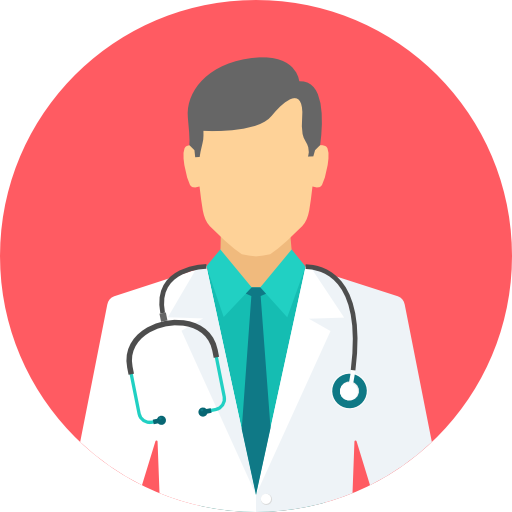
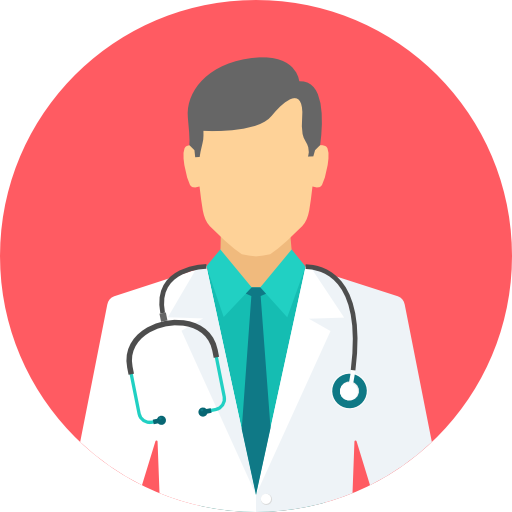
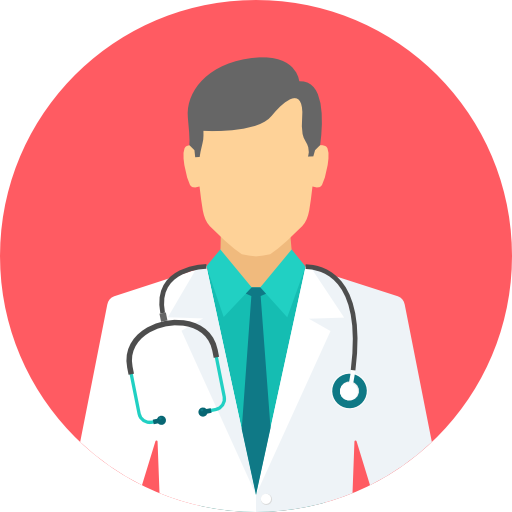
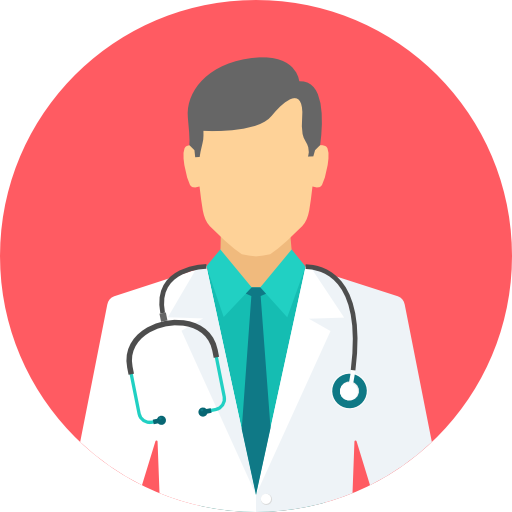
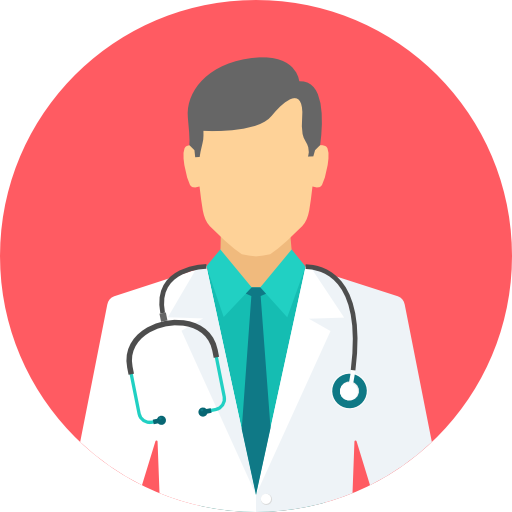
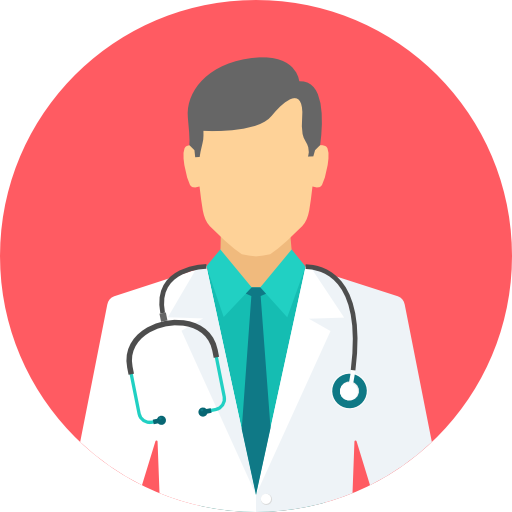
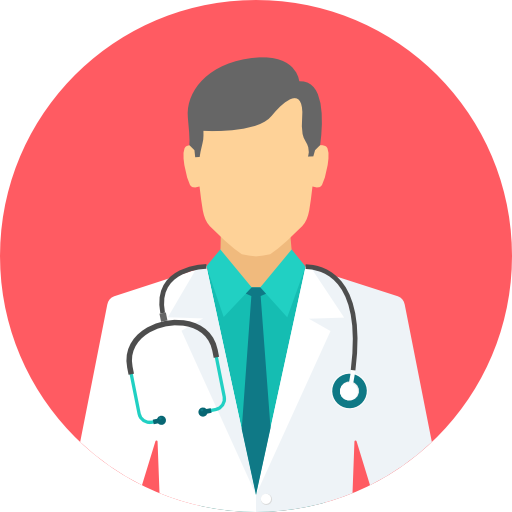
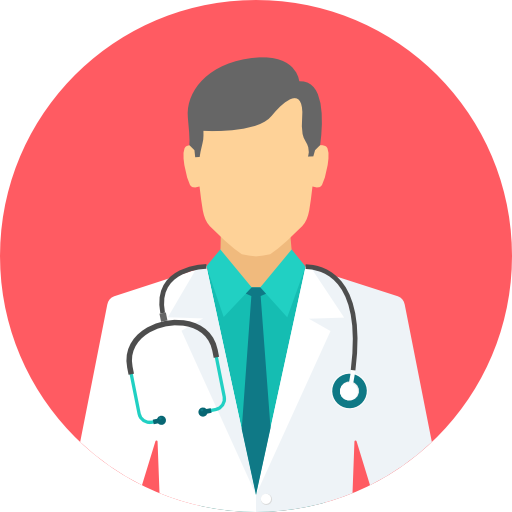
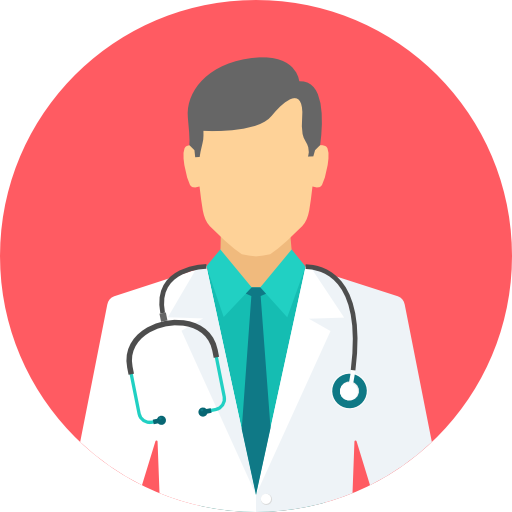
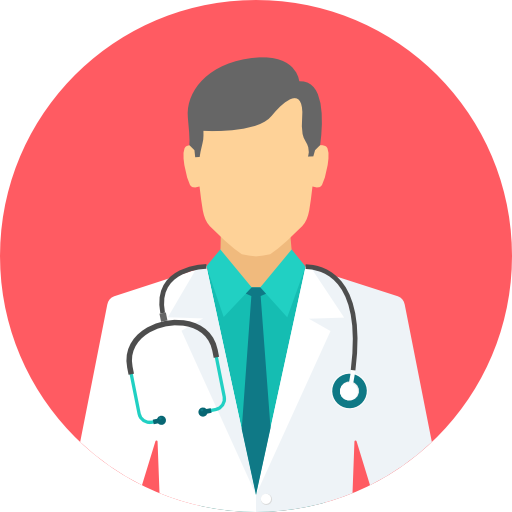
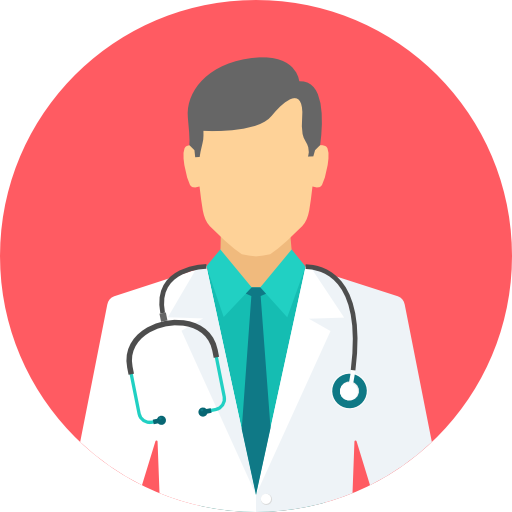
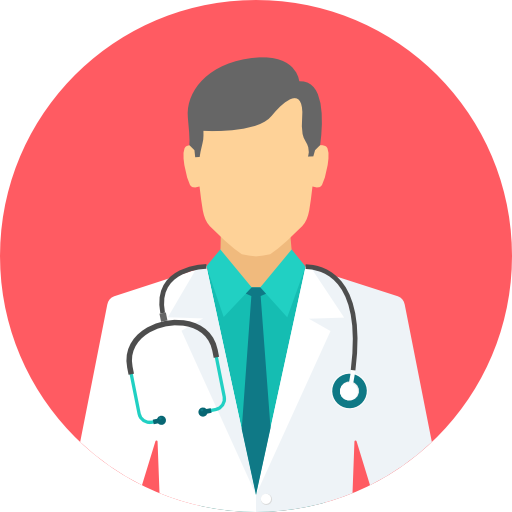
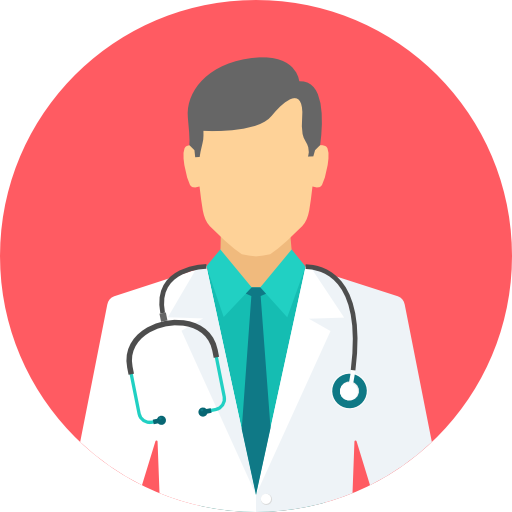
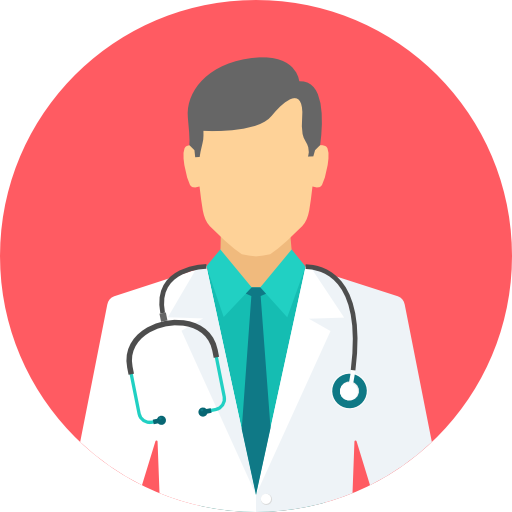
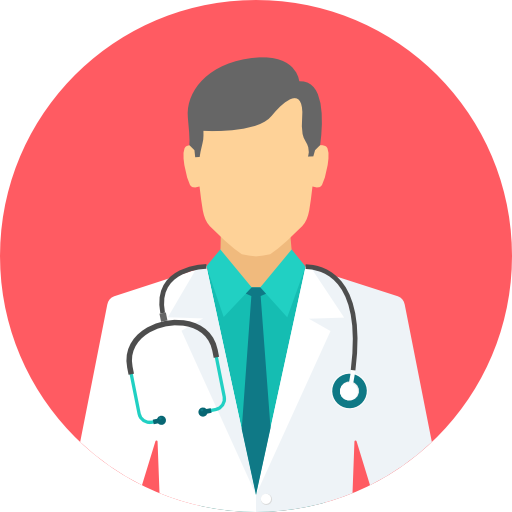
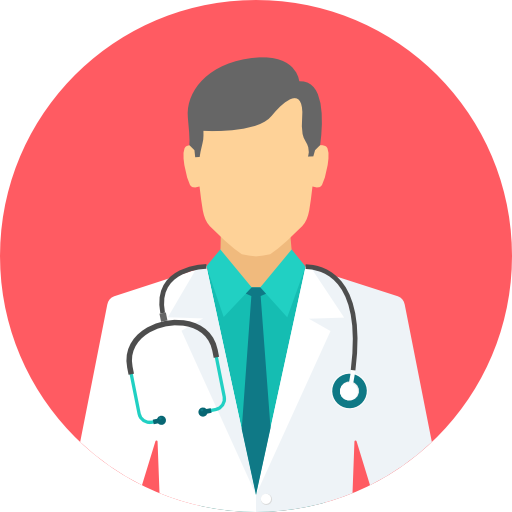
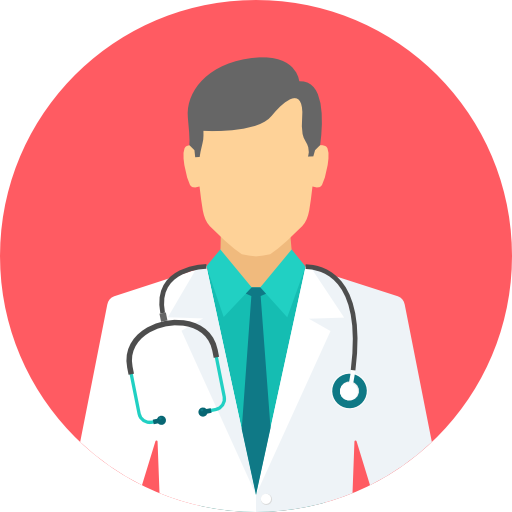
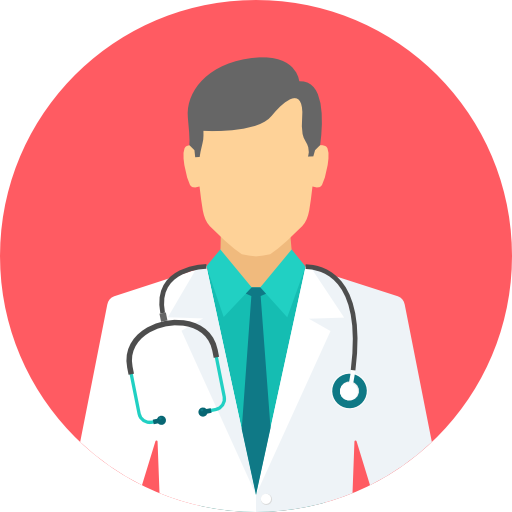
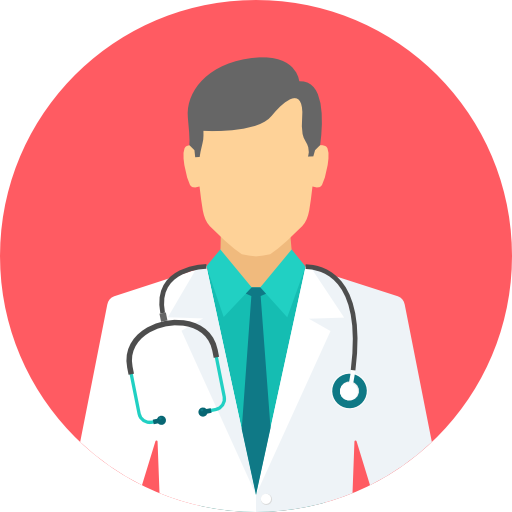
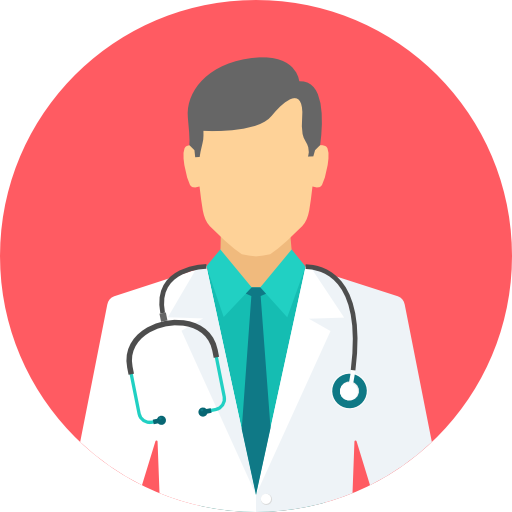
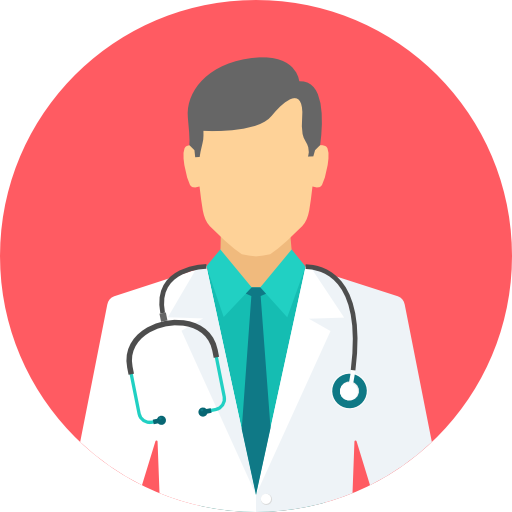
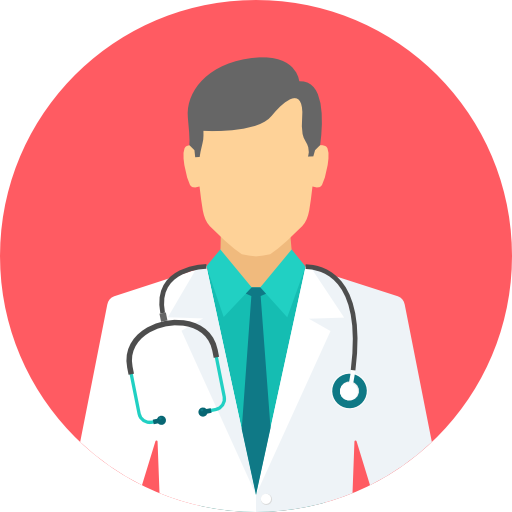
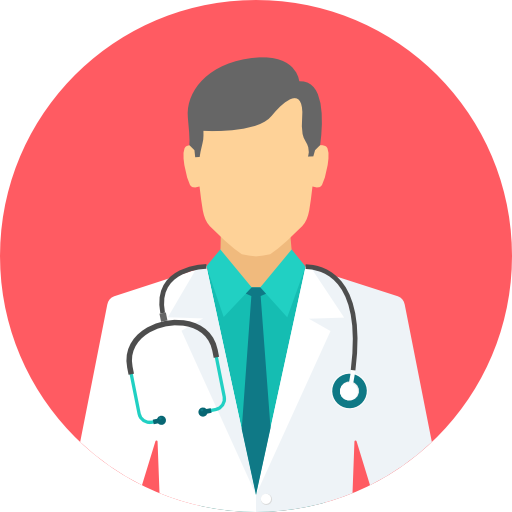
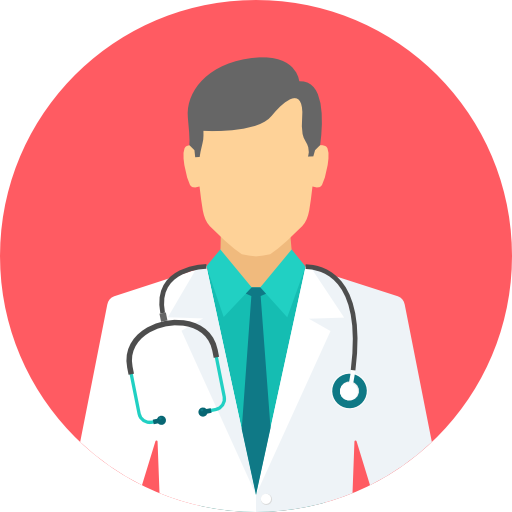
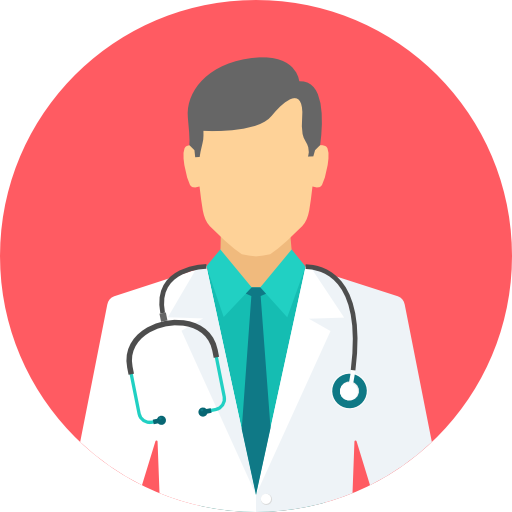
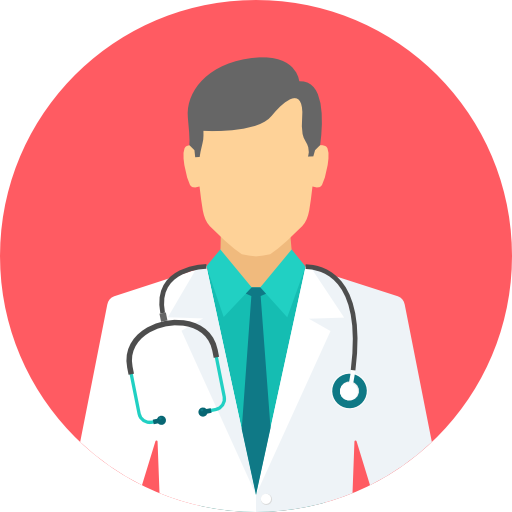
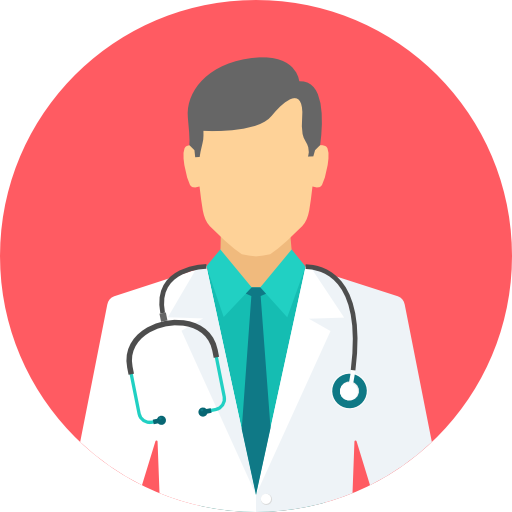
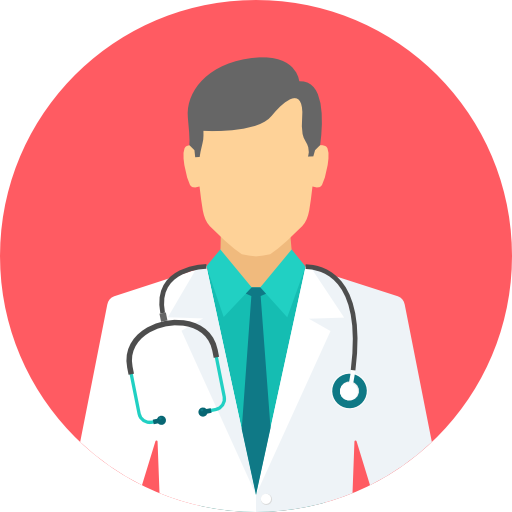
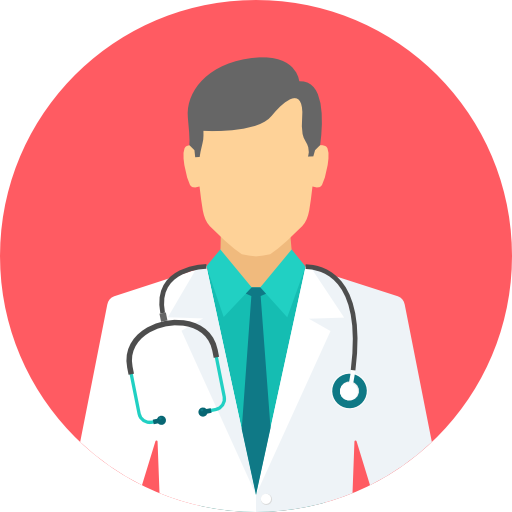
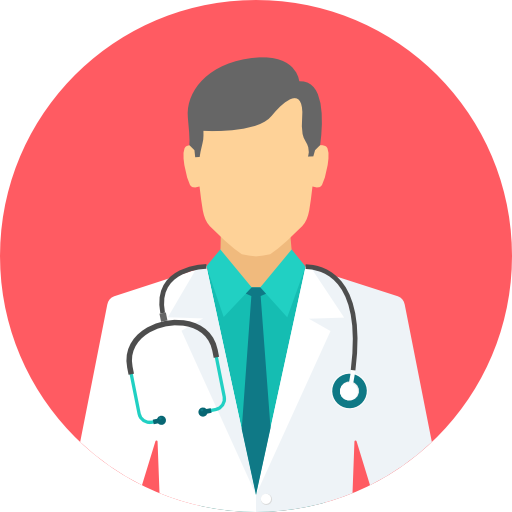
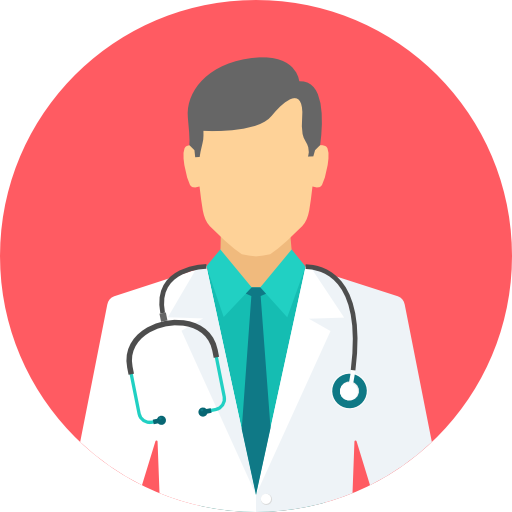
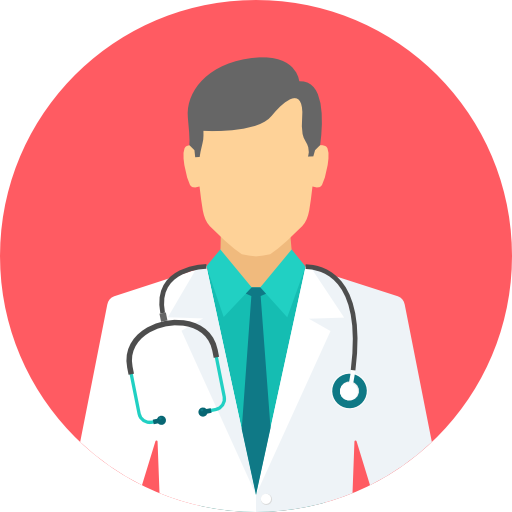
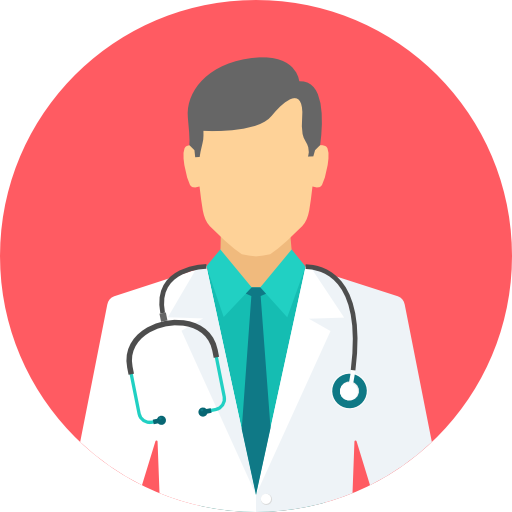
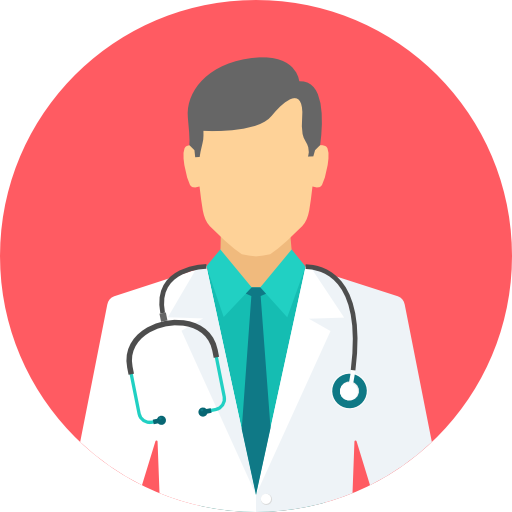
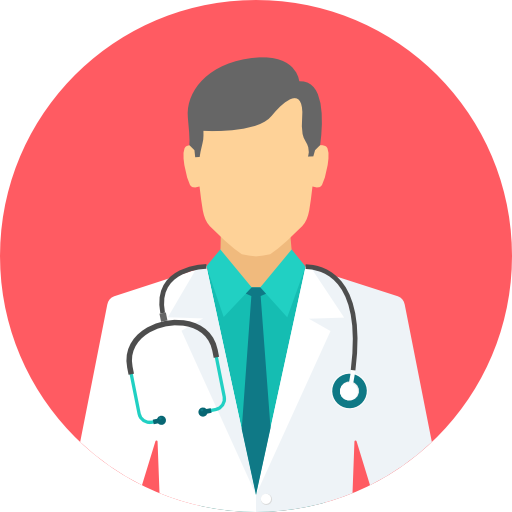
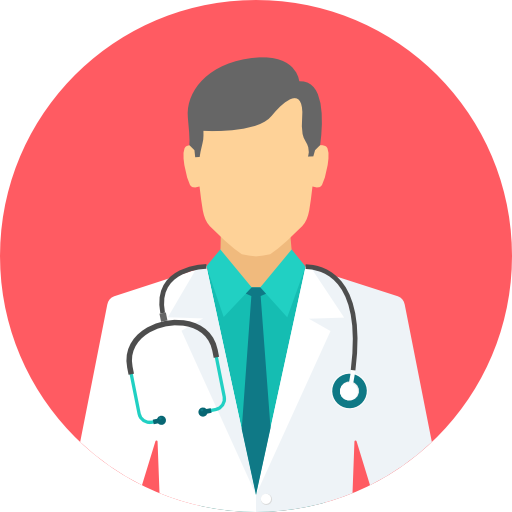
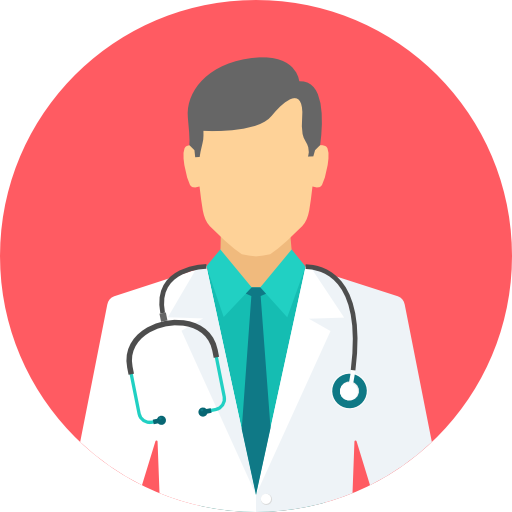
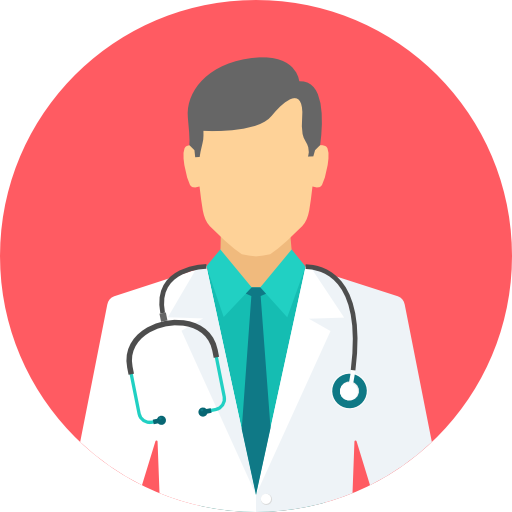
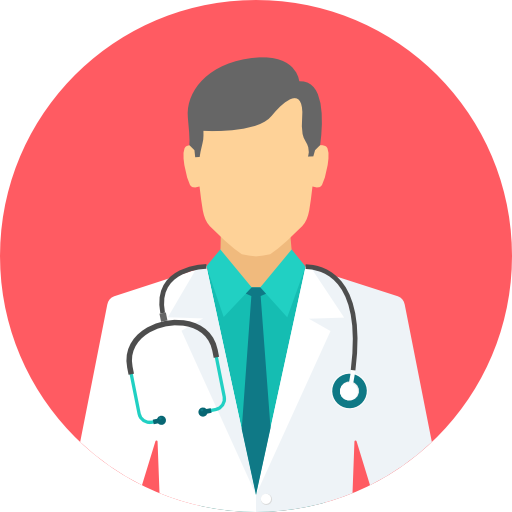
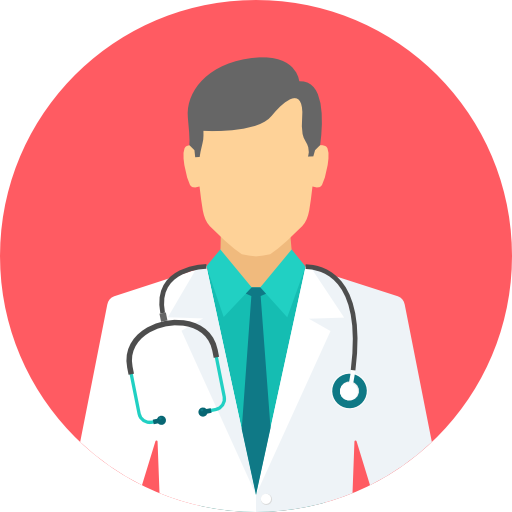

In [43]:
for i in range(3000):
  medecin_bretagne= medecin.loc[i]
  lattitude = medecin_bretagne['Coordonnées'].split(',')[0]
  logitude = medecin_bretagne['Coordonnées'].split(',')[1]
  lattitude=float(lattitude)
  logitude=float(logitude)
  left_col_color = "#3e95b5"
  right_col_color = "#f2f9ff"
  html = """
  <!DOCTYPE html>
  <html>
  <center> <table style="height: 126px; width: 280px;border: 1px solid black">
  <tbody>
  <tr>
  <td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;"> Nom du professionnel</span></td>
  <td style="width: 150px;background-color: """+ right_col_color +""";">"""+ medecin_bretagne["Nom du professionnel"] + """</td>
  </tr>
  <tr>
  <td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;"> Adresse</span></td>
  <td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format( medecin_bretagne["Adresse"] ) + """
  </tr>
  <tr>
  <td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;"> Numéro de téléphone </span></td>
  <td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format( medecin_bretagne["Numéro de téléphone"] ) + """
  </tr>
  <tr>
  <td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;"> Ville </span></td>
  <td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format( medecin_bretagne["Commune"] ) + """
  </tr>
  </tbody>
  </table></center>
  </html>
  """
  my_map.add_child(folium.Marker(
      icon = folium.features.CustomIcon('/content/doctor.png',icon_size=(20, 20)),
      location = [lattitude,logitude],
      tooltip='Plus d\'infos',
      popup=html,
  ))

my_map

Save the map into HTML

In [ ]:
my_map.save('Medecin_bretagne3000.html')